In [1]:
import pandas as pd
import geopandas as gpd
import folium
import shapely
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc, rcParams
def set_korea_font():
    font_name = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/AppleGothic.ttf").get_name()
    rc('font', family=font_name)
    rcParams.update({'font.size': 11})
    rcParams['axes.unicode_minus'] = False  
set_korea_font()

In [2]:
data = pd.read_csv("../data/crawling/GIS/2021_01_12_03_44_final.csv")

In [3]:
data.head()

,Unnamed: 0,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,lat,lon
0,0,2017012800100166,2017년 1월 28일 14시,토요일,경기도 오산시 금암동,경상사고,0,0,6,0,...,승용,남,62세,상해없음,승용,남,39세,경상,37.174346,127.050546
1,1,2017030600100321,2017년 3월 6일 15시,월요일,경기도 오산시 금암동,부상신고사고,0,0,0,1,...,승합,남,54세,상해없음,보행자,남,9세,부상신고,37.175516,127.049976
2,2,2017030600100420,2017년 3월 6일 18시,월요일,경기도 오산시 원동,중상사고,0,1,0,0,...,승합,남,48세,상해없음,보행자,여,12세,중상,37.136190,127.082544
3,3,2017031500100415,2017년 3월 15일 17시,수요일,경기도 오산시 오산동,중상사고,0,1,0,0,...,승합,여,53세,상해없음,자전거,남,11세,중상,37.153618,127.077133
4,4,2017032100100170,2017년 3월 21일 09시,화요일,경기도 오산시 세교동,중상사고,0,1,1,0,...,건설기계,남,54세,상해없음,승용,여,31세,중상,37.186427,127.038726


## 사고 시간대

In [34]:
data.사고일시.str[:4].value_counts()

2014    68
2019    64
2010    59
2016    59
2017    59
2009    56
2011    50
2012    50
2018    49
2013    49
2007    46
2008    45
2015    37
Name: 사고일시, dtype: int64

In [36]:
data.사고일시.str[5:8].value_counts()

 5월    81
 6월    79
 7월    70
 10    69
 9월    67
 4월    60
 8월    56
 3월    49
 12    48
 11    40
 1월    38
 2월    34
Name: 사고일시, dtype: int64

In [4]:
data.사고일시.str[-3:].value_counts()

16시    77
17시    74
18시    71
15시    58
14시    52
19시    48
21시    44
08시    39
09시    37
13시    34
12시    31
20시    31
10시    24
11시    22
22시    16
23시    11
07시     7
02시     5
00시     5
06시     4
01시     1
Name: 사고일시, dtype: int64

In [5]:
time_ls = list(data.사고일시.str[-3:].value_counts())

([<matplotlib.patches.Wedge at 0x7fa46ff15050>,
 [Text(1.0332812472341362, 0.3772663039740869, '16시'),
  Text(0.5600746722777347, 0.9467398594508358, '17시'),
  Text(-0.13717192448553195, 1.0914136993518708, '18시'),
  Text(-0.7182830366796912, 0.8331083238200191, '15시'),
  Text(-1.0298081556357814, 0.38664604302388816, '14시'),
  Text(-1.0949902592223157, -0.10486339784808633, '19시'),
  Text(-0.9579994659244125, -0.5405895145935967, '21시'),
  Text(-0.691409961779768, -0.8555420882409585, '08시'),
  Text(-0.36077702671004575, -1.039153471340138, '09시'),
  Text(-0.012502390470455753, -1.0999289478109595, '13시'),
  Text(0.3083787529619336, -1.0558894566769965, '12시'),
  Text(0.5899161595167344, -0.928438972006791, '20시'),
  Text(0.801317576414612, -0.7535848603369183, '10시'),
  Text(0.9403130047372953, -0.5707989603371045, '11시'),
  Text(1.024438955995874, -0.4006554947059681, '22시'),
  Text(1.065788877102337, -0.27220225833916245, '23시'),
  Text(1.0844730912097935, -0.18416871189720363, '07

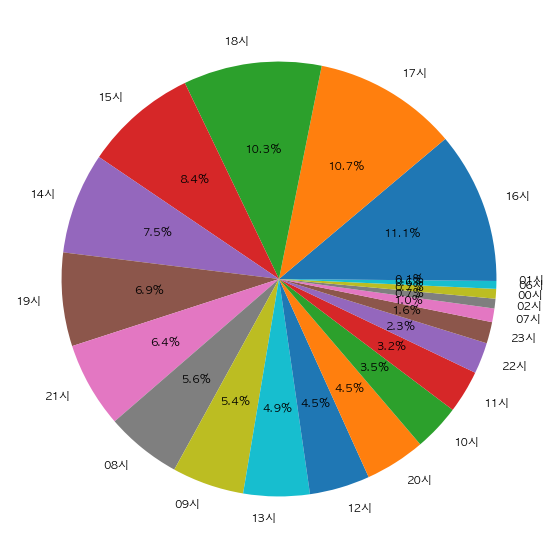

In [6]:
plt.figure(figsize = (10, 10))
plt.pie([float(x)/sum(time_ls) for x in time_ls], 
        labels = list(data.사고일시.str[-3:].value_counts().index),
       autopct='%.1f%%')

16 - 18시가 압도적으로 많은것을 확인할 수 있다

## 요일

In [7]:
data.요일.value_counts()

금요일    121
토요일    109
화요일     96
일요일     96
수요일     93
월요일     89
목요일     87
Name: 요일, dtype: int64

In [8]:
time_ls = list(data.요일.value_counts())

([<matplotlib.patches.Wedge at 0x7fa47009a810>,
 [Text(0.9377081489630841, 0.5750681936676961, '금요일'),
  Text(-0.02750308789971694, 1.0996561190463048, '토요일'),
  Text(-0.8992307544280809, 0.6335487749895068, '화요일'),
  Text(-1.063269749503037, -0.28188196074199023, '일요일'),
  Text(-0.4808094465277936, -0.9893544744577835, '수요일'),
  Text(0.4029832232578754, -1.023525535476616, '월요일'),
  Text(1.015067199780152, -0.4238379170514142, '목요일')],
 [Text(0.5114771721616822, 0.31367356018237963, '17.5%'),
  Text(-0.01500168430893651, 0.5998124285707116, '15.8%'),
  Text(-0.4904895024153168, 0.34557205908518546, '13.9%'),
  Text(-0.5799653179107475, -0.1537537967683583, '13.9%'),
  Text(-0.26225969810606925, -0.5396478951587909, '13.5%'),
  Text(0.219809030867932, -0.5582866557145177, '12.9%'),
  Text(0.553673018061901, -0.23118431839168047, '12.6%')])

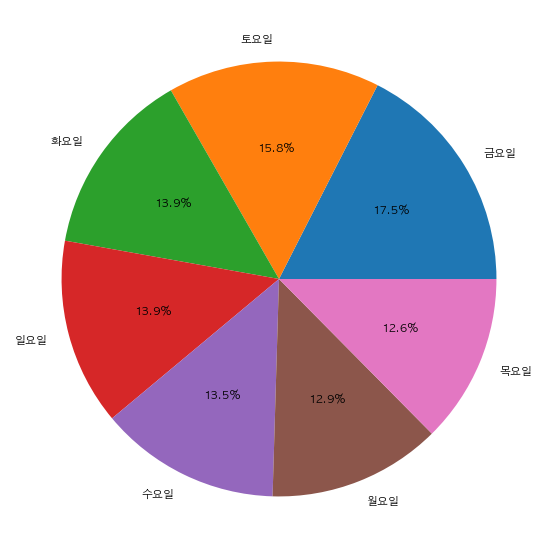

In [9]:
plt.figure(figsize = (10, 10))
plt.pie([float(x)/sum(time_ls) for x in time_ls], 
        labels = list(data.요일.value_counts().index),
       autopct='%.1f%%')

금토가 많다

In [10]:
data["time"] = data.요일 + " " + data.사고일시.str[-3:]
data.time.value_counts().head(20)

일요일 18시    17
금요일 17시    16
수요일 16시    14
금요일 16시    13
금요일 08시    12
화요일 19시    12
목요일 15시    12
토요일 13시    11
일요일 16시    11
수요일 14시    11
월요일 15시    11
월요일 17시    11
토요일 18시    11
화요일 16시    11
목요일 18시    10
목요일 17시    10
금요일 18시    10
목요일 16시    10
화요일 17시    10
월요일 16시     9
Name: time, dtype: int64

top 20 중 오전은 한 개 있다. 금요일 오전엔 무슨 일이 있었던 걸까..

## 사고내용

In [11]:
data.사고내용.value_counts()

경상사고      368
중상사고      284
부상신고사고     38
사망사고        1
Name: 사고내용, dtype: int64

중상과 나머지 사이에 어떤 연관성이 있을까

In [12]:
jung = data[data["사고내용"] == "중상사고"]
gyeong = data[data["사고내용"] != "중상사고"]

In [13]:
jung.사고일시.str[-3:].value_counts()

16시    35
17시    29
18시    27
15시    27
14시    21
09시    17
21시    16
19시    15
13시    15
12시    15
20시    13
08시    13
11시    12
10시    11
22시     8
23시     4
00시     2
02시     2
07시     1
06시     1
Name: 사고일시, dtype: int64

In [14]:
gyeong.사고일시.str[-3:].value_counts()

17시    45
18시    44
16시    42
19시    33
15시    31
14시    31
21시    28
08시    26
09시    20
13시    19
20시    18
12시    16
10시    13
11시    10
22시     8
23시     7
07시     6
02시     3
00시     3
06시     3
01시     1
Name: 사고일시, dtype: int64

시간대에서는 별 차이가 없다

In [15]:
jung.법규위반.value_counts()

안전운전불이행      159
신호위반          57
보행자보호의무위반     28
교차로운행방법위반     11
중앙선침범         10
안전거리미확보        9
기타             6
과속             2
차로위반           1
직진우회전진행방해      1
Name: 법규위반, dtype: int64

In [16]:
gyeong.법규위반.value_counts()

안전운전불이행      259
신호위반          69
교차로운행방법위반     24
보행자보호의무위반     24
안전거리미확보       13
기타             8
직진우회전진행방해      3
중앙선침범          3
차로위반           2
불법유턴           1
과속             1
Name: 법규위반, dtype: int64

In [17]:
data.columns

Index(['Unnamed: 0', '사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', 'lat', 'lon', 'time'],
      dtype='object')

In [18]:
jung.기상상태.value_counts()

맑음    255
비      14
흐림     13
눈       2
Name: 기상상태, dtype: int64

In [19]:
gyeong.기상상태.value_counts()

맑음    374
비      18
흐림     11
눈       4
Name: 기상상태, dtype: int64

In [20]:
jung.노면상태.value_counts()

포장 - 건조       262
포장 - 습기        17
포장 - 젖음/습기      3
포장 - 결빙         2
Name: 노면상태, dtype: int64

In [21]:
gyeong.노면상태.value_counts()

포장 - 건조       374
포장 - 습기        14
포장 - 젖음/습기      9
포장 - 결빙         6
비포장 - 건조        2
포장 - 적설         1
포장 - 서리/결빙      1
Name: 노면상태, dtype: int64

In [22]:
jung.도로형태.value_counts()

단일로 - 기타          120
교차로 - 교차로안         71
교차로 - 교차로부근        35
단일로 - 횡단보도상        31
기타 - 기타            12
교차로 - 교차로횡단보도내      9
단일로 - 횡단보도부근        4
단일로 - 터널            1
단일로 - 교량            1
Name: 도로형태, dtype: int64

In [23]:
gyeong.도로형태.value_counts()

단일로 - 기타           152
교차로 - 교차로안         110
교차로 - 교차로부근         74
단일로 - 횡단보도상         23
기타 - 기타             20
교차로 - 교차로횡단보도내      16
단일로 - 횡단보도부근         4
주차장 - 주차장            3
단일로 - 교량             2
단일로 - 지하차도(도로)내      2
단일로 - 터널             1
Name: 도로형태, dtype: int64

In [24]:
jung["가해운전자 차종"].value_counts()

승용      195
화물       36
승합       32
이륜        8
원동기       4
자전거       3
기타불명      2
건설기계      2
농기계       1
특수        1
Name: 가해운전자 차종, dtype: int64

In [25]:
gyeong["가해운전자 차종"].value_counts()

승용      268
화물       48
승합       30
기타불명     20
이륜       15
자전거      11
건설기계      7
원동기       7
특수        1
Name: 가해운전자 차종, dtype: int64

In [26]:
jung["피해운전자 연령"].value_counts()

12세    22
8세     20
7세     19
6세     15
10세    14
5세     14
9세     14
11세    11
38세     9
46세     9
32세     8
41세     8
4세      8
37세     7
36세     7
42세     7
40세     7
30세     7
34세     6
31세     6
3세      5
35세     5
45세     4
43세     4
33세     4
52세     4
44세     3
54세     3
2세      3
51세     3
47세     3
62세     2
57세     2
66세     2
53세     2
49세     2
39세     2
56세     1
68세     1
48세     1
59세     1
60세     1
25세     1
28세     1
23세     1
50세     1
24세     1
29세     1
27세     1
Name: 피해운전자 연령, dtype: int64

In [27]:
gyeong["피해운전자 연령"].value_counts()

7세     29
9세     24
6세     24
10세    23
12세    23
8세     19
37세    18
36세    15
5세     13
31세    12
11세    12
42세    11
41세    11
38세    11
35세    10
43세    10
32세    10
30세     9
33세     8
49세     8
34세     8
39세     8
29세     7
3세      7
4세      6
40세     5
27세     5
46세     5
2세      4
28세     4
44세     4
53세     4
57세     3
47세     3
63세     2
51세     2
45세     2
24세     2
50세     2
58세     2
54세     2
1세      2
56세     2
26세     2
52세     1
25세     1
70세     1
60세     1
67세     1
Name: 피해운전자 연령, dtype: int64

In [28]:
jung.사고유형.value_counts()

차대사람 - 횡단중           91
차대차 - 측면직각충돌         40
차대사람 - 기타            28
차대차 - 추돌 - 진행중       23
차대차 - 기타             21
차대차 - 측면충돌           20
차대차 - 정면충돌           19
차대차 - 추돌 - 주정차중      19
차대차 - 추돌              8
차대사람 - 길가장자리구역통행중     6
차대사람 - 보도통행중          5
차대사람 - 차도통행중          3
차량단독 - 공작물충돌          1
Name: 사고유형, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa4702aba90>,
 [Text(0.5881761021499794, 0.9295422921307331, '차대사람 - 횡단중'),
  Text(-0.8512755973509266, 0.6966561973849248, '차대차 - 측면직각충돌'),
  Text(-1.0975780293241102, -0.0729552571443796, '차대사람 - 기타'),
  Text(-0.8884860530833961, -0.6485310582202589, '차대차 - 추돌 - 진행중'),
  Text(-0.48196518736508326, -0.9887919691058076, '차대차 - 기타'),
  Text(2.574735773252454e-08, -1.0999999999999999, '차대차 - 측면충돌'),
  Text(0.45997315016522167, -0.9992120401231576, '차대차 - 정면충돌'),
  Text(0.8276920414250056, -0.7245176909929163, '차대차 - 추돌 - 주정차중'),
  Text(1.0042390248555242, -0.44889194797548576, '차대차 - 추돌'),
  Text(1.0614614124689965, -0.28861682182319753, '차대사람 - 길가장자리구역통행중'),
  Text(1.088645611290809, -0.15764115267677115, '차대사람 - 보도통행중'),
  Text(1.0983178889565992, -0.06080966039963931, '차대사람 - 차도통행중'),
  Text(1.0999326993169314, -0.012167866426348841, '차량단독 - 공작물충돌')],
 [Text(0.3208233284454433, 0.5070230684349453, '32.0%'),
  Text(-0.46433214400959627, 0.3799942894826

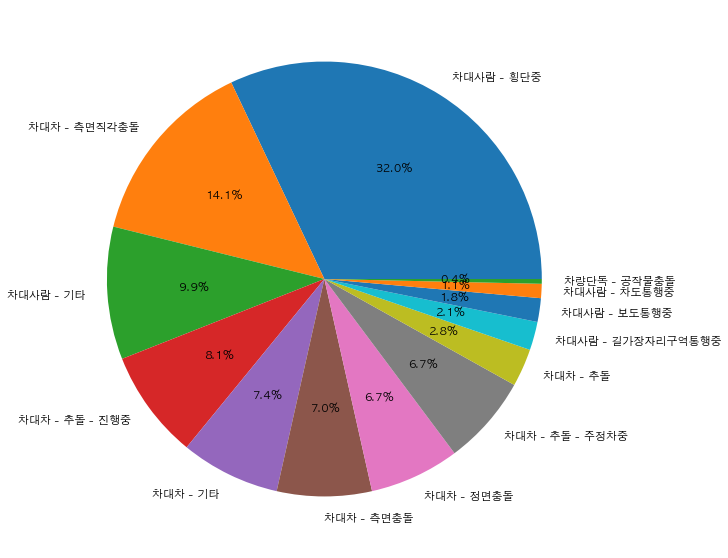

In [29]:
time_ls = list(jung.사고유형.value_counts())

plt.figure(figsize = (10, 10))
plt.pie([float(x)/sum(time_ls) for x in time_ls], 
        labels = list(jung.사고유형.value_counts().index),
       autopct='%.1f%%')

In [30]:
gyeong.사고유형.value_counts()

차대사람 - 횡단중           76
차대차 - 측면직각충돌         66
차대차 - 기타             59
차대사람 - 기타            50
차대차 - 측면충돌           33
차대차 - 정면충돌           30
차대차 - 추돌 - 주정차중      26
차대차 - 추돌             21
차대차 - 추돌 - 진행중       17
차대사람 - 차도통행중          9
차대사람 - 보도통행중          7
차량단독 - 공작물충돌          5
차량단독 - 기타             3
차대사람 - 길가장자리구역통행중     2
차대차 - 후진중충돌           2
차량단독 - 도로외이탈 - 추락     1
Name: 사고유형, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa470344590>,
 [Text(0.916088043682312, 0.6089192854741216, '차대사람 - 횡단중'),
  Text(-0.12285956612940217, 1.0931173436600918, '차대차 - 측면직각충돌'),
  Text(-0.9684825759247898, 0.5215759773322425, '차대차 - 기타'),
  Text(-1.0343057169696268, -0.37444850626480874, '차대사람 - 기타'),
  Text(-0.6053792196571937, -0.9184312714663234, '차대차 - 측면충돌'),
  Text(-0.10597035920871165, -1.0948836846757635, '차대차 - 정면충돌'),
  Text(0.36244809423589375, -1.0385717977033504, '차대차 - 추돌 - 주정차중'),
  Text(0.7074275875995362, -0.8423456584461634, '차대차 - 추돌'),
  Text(0.9207608475174343, -0.601830093696698, '차대차 - 추돌 - 진행중'),
  Text(1.0222532151694788, -0.4061999065431498, '차대사람 - 차도통행중'),
  Text(1.0645062188319798, -0.2771759550683309, '차대사람 - 보도통행중'),
  Text(1.0855801245970065, -0.17752687988005628, '차량단독 - 공작물충돌'),
  Text(1.0944665421241464, -0.11019522753193316, '차량단독 - 기타'),
  Text(1.0979033942206733, -0.06788325978269671, '차대사람 - 길가장자리구역통행중'),
  Text(1.0994757221507145, -0.033957862140676

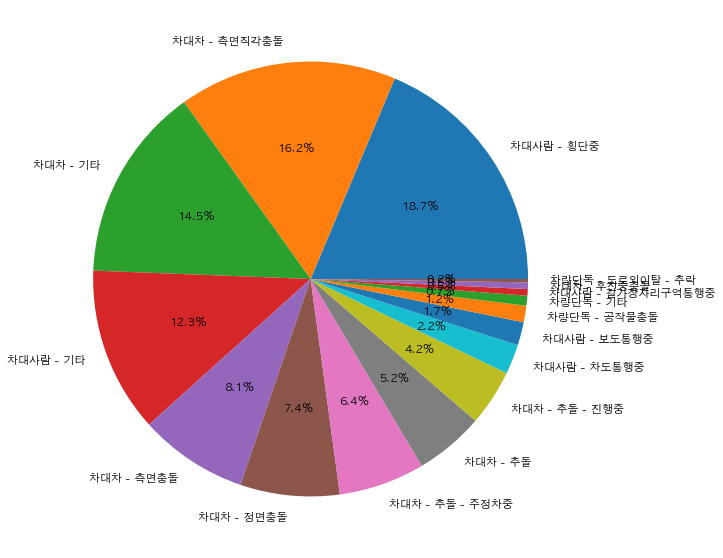

In [31]:
time_ls = list(gyeong.사고유형.value_counts())

plt.figure(figsize = (10, 10))
plt.pie([float(x)/sum(time_ls) for x in time_ls], 
        labels = list(gyeong.사고유형.value_counts().index),
       autopct='%.1f%%')

중상인 경우가 확실히 횡단중인 경우가 아주 많다 (1/3 정도)